### Group Members:
+ Pia Cuck
+ Jeanine Liebold
+ Finn Rietz

To run the code, place in root directory of https://github.com/AllenDowney/ThinkBayes2, so that import statements work.

# Task 1
The security guard at the Informatikum has read the Bayes book that a student forgot and now wants to estimate the number of international students on our campus. He wants to do this by asking 20 students randomly between 8:00 and 10:30, since he thinks that this should give him a good representative sample. He thinks of a sensible prior and a likelihood function and starts asking. After a successful morning, he has the following list written down: [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] where 1=international and 0=not_international.
What would his estimate be? Give a number and a 90% credible interval. 


In [1]:
from __future__ import print_function
from scripts.dice import Dice
import thinkplot
from thinkbayes2 import Suite

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
import numpy as np

In [2]:
class Ikum(Suite):
    """Pretty much taken from the book examples"""

    def Likelihood(self, observation, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: integer number hypothesis abouth number of international studends
        observation: observed number of international students
        """
        
        # if we observed more students than we hypothized, prob of that hypothesis is 0
        if hypo < observation:
            return 0
        else:
            # only change I made for the liklihood.
            # for the die example, the liklihood was always 1/hypo
            # We changed this to observation/hypo
            # Thus, if we observe 5 international students and our hypo is 5, prob is 1
            return observation / hypo


In [3]:
# calculates percentiles, taken form think bayes book
def Percentile(pmf, percentage):
    p = percentage / 100.0
    total = 0
    for val, prob in pmf.Items():
        total += prob
        if total >= p:
            return val

No handles with labels found to put in legend.


Mean of posterior distribution: 10.243
90% Confidence interval: (5, 18)


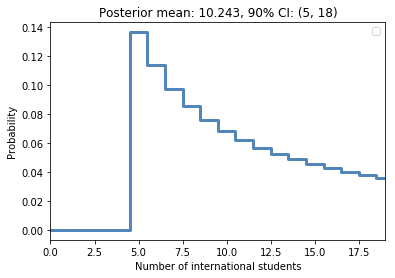

<Figure size 576x432 with 0 Axes>

In [4]:
observation = [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

# Generates hypothesis. 
# One hypothesis represents a possible number of international student 
hypos = range(0, len(observation))
suite = Ikum(hypos)

# Update function provided by the Bayes fromwork form the ThinkBays book.
# Update the probabiliy dist behind each hypothesis according to the likelihood function
suite.Update(sum(observation))

# the mean is our final estimate
rounded_mean = round(suite.Mean(), 3)
print("Mean of posterior distribution: {}".format(rounded_mean))

# calculate the 90% confidence interval 
interval = Percentile(suite, 5), Percentile(suite, 95)
print("90% Confidence interval: {}".format(interval))

# show figure
thinkplot.PrePlot(1)
thinkplot.Pmf(suite)
thinkplot.show(
    xlim=(0, 19), 
    title="Posterior mean: {}, 90% CI: {}".format(rounded_mean, interval),
    xlabel='Number of international students',
    ylabel='Probability')

# Task 2
You are playing a heated game of Dungeons & Dragons and the dungeon master's (DM) main character always attacks you with two weapons (one die each). 
You would like to know what type of weapons they are and could guess, if you knew the individual damage rolls, but the DM only gives you the sum of the rolled values (each die represents one weapon). You know it has to be either a d6, d8, d10, or d12 (dX = X-sided die) for either weapon and the DM always rolls two at the same time and gives you the sum. Your hypothesis would be that it is a d6 and a d10. What is the likelihood for this hypothesis, if the last 5 throws gave you the summed numbers [10, 12, 15, 4, 7]

In [5]:
class DualDice(Suite):
    """
    Our implementation of the dual dice probabilities.
    
    We calculate liklihood updates as follows:
    We observed a score. If the score is greater than the total score our dice could produce, return zero.
    Otherwise, for each die in our dual die set, we calculate the probability of getting any side of the die.
    We can do this, as the probability for each side is the same. The total prob for computing the observed score is 
    simply the conjoint probability, as the rolls are independent of one another.
    
    """
    def Likelihood(self, combined_score, dice_set):
        if combined_score <= sum(dice_set):
            combined_prob = 1
            for dice in dice_set:
                prob = 1 / dice
                # for the first die, we multiply by one
                # for the second die we multiply by the previos prob.
                combined_prob *= prob
            return combined_prob
        else:
            return 0

In [6]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

Best die tuple: (6, 10), probability: 0.23.


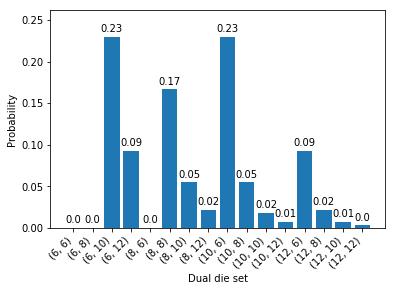

In [7]:
# generate die combinations of possible die combinations
die_list = [6, 8, 10, 12]
die_combs = [p for p in itertools.product(die_list, repeat=2)]

# create suite of hypothesis
suite = DualDice(die_combs)

# update the probability distribution over the hypothesis, according to the observations and the likelihood function
for roll in [10, 12, 15, 4, 7]:
    suite.Update(roll)

# print('After more rolls')
# suite.Print()
print("Best die tuple: {}, probability: {}.".format(max(suite, key=suite.d.get), round(max(list(suite.d.values())), 2)))

# plot the result
f, ax = plt.subplots(1, 1)
x = np.arange(0, len(suite.d.keys()))
rects = ax.bar(x, list(suite.d.values()))
ax.set_xticks(x)
ax.set_xticklabels(list(suite.d.keys()), rotation=45, ha="right")

autolabel(rects, ax)

plt.ylim(0, ax.get_ylim()[1]+0.02)
plt.ylabel("Probability")
plt.xlabel("Dual die set")
plt.show()